<a href="https://colab.research.google.com/github/tawsif5001/brain_tumor_detection_app-using-cnn/blob/main/Resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow numpy matplotlib scikit-learn opencv-python


Found 1311 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 698s 16s/step - accuracy: 0.2905 - loss: 1.5555 - val_accuracy: 0.4622 - val_loss: 1.2684
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 661s 15s/step - accuracy: 0.3444 - loss: 1.4188 - val_accuracy: 0.3684 - val_loss: 1.2271
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 548s 13s/step - accuracy: 0.4070 - loss: 1.3111 - val_accuracy: 0.4226 - val_loss: 1.2061
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 582s 14s/step - accuracy: 0.3884 - loss: 1.2760 - val_accuracy: 0.4119 - val_loss: 1.1985
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 600s 13s/step - accuracy: 0.3549 - loss: 1.2779 - val_accuracy: 0.4859 - val_loss: 1.1604
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 559s 13s/step - accuracy: 0.4289 - loss: 1.2164 - val_accuracy: 0.4798 - val_loss: 1.1604
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 539s 13s/step - accuracy: 0.4148 - loss: 1.2321 - val_accuracy: 0.4203 - val_loss: 1.1628
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 541s 13s/step - accuracy: 0.4098 - loss: 1.2265 - val_accuracy: 0.4111 - val_

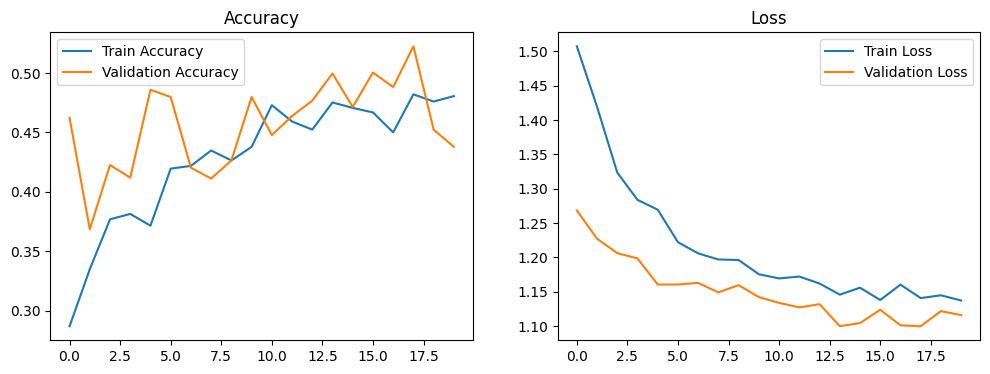

41/41 ━━━━━━━━━━━━━━━━━━━━ 337s 8s/step

Classification Report:
              precision    recall  f1-score   support

      glioma       0.54      0.41      0.47       300
  meningioma       0.40      0.31      0.35       306
     notumor       0.58      0.78      0.67       405
   pituitary       0.50      0.50      0.50       300

    accuracy                           0.52      1311
   macro avg       0.51      0.50      0.50      1311
weighted avg       0.51      0.52      0.51      1311



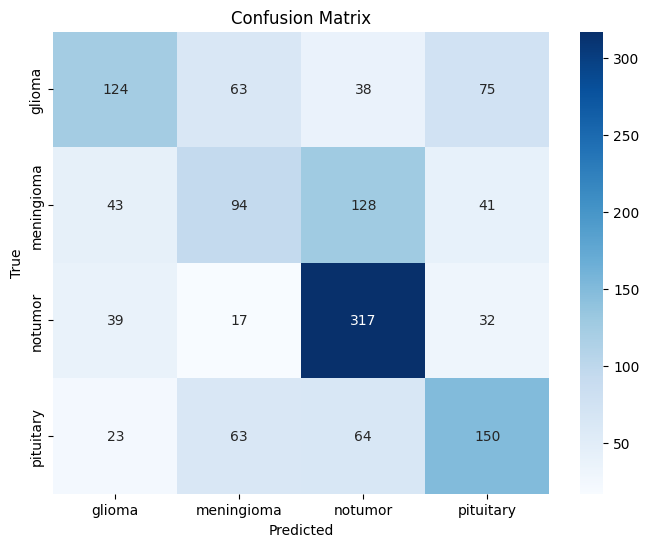

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Define Paths and Parameters
train_dir = '/content/drive/MyDrive/dataset1/train'
val_dir = '/content/drive/MyDrive/dataset1/val'
test_dir = '/content/drive/MyDrive/dataset1/test'

img_size = (224, 224)  # ResNet input size
batch_size = 32
epochs = 20
num_classes = 4

# Step 2: Data Augmentation and Generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Step 3: Load Pre-trained ResNet50 Model and Fine-tune
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the Model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=[early_stopping]
)

# Step 5: Evaluate the Model
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Step 6: Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

# Step 7: Classification Report and Confusion Matrix
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 8: Predict Function for New MRI Images
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_image(img_path):
    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_names = list(train_generator.class_indices.keys())
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction)
    return predicted_class, confidence
